We are working on a movie dataset scraped from imdb.
The idea is to clean up the dataset with pandas and to look for possible correlations.

Link to dataset : https://www.kaggle.com/datasets/danielgrijalvas/movies

In [36]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import scipy.stats
from scipy import stats
from scipy.stats import pearsonr

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Let's read the data 

df = pd.read_csv('/Users/guillaumebesson/Desktop/movies.csv')

In [3]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# checking for missing data. 

df[df.isnull().any(axis=1)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
#Out of 7668 rows, 2247 contain "NULL" values

#Let's run a command to get more details.
df.info()

#We see below that budget is the most problematic column with a lot of missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
#Let's drop the rows that contains "Null" values so we can work on a clean dataset.

df = df.dropna()

# We now have 5421 rows left for our analysis.

In [9]:
#Let's check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# We want to change some data types for a cleaner dataset: budget, score, votes, runtime, gross

df['budget'] = df['budget'].astype('int64')
df['score'] = df['score'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [19]:
# There's a mismatch between year and released year. 
#Let's create a new column that takes the year from released column.


df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [30]:
#let's sort values by gross

df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [31]:
pd.set_option('display.max_rows', None) # to see every rows and not just 20

In [32]:
# Any duplicates in the dataframe ?

df.duplicated().sum()

0

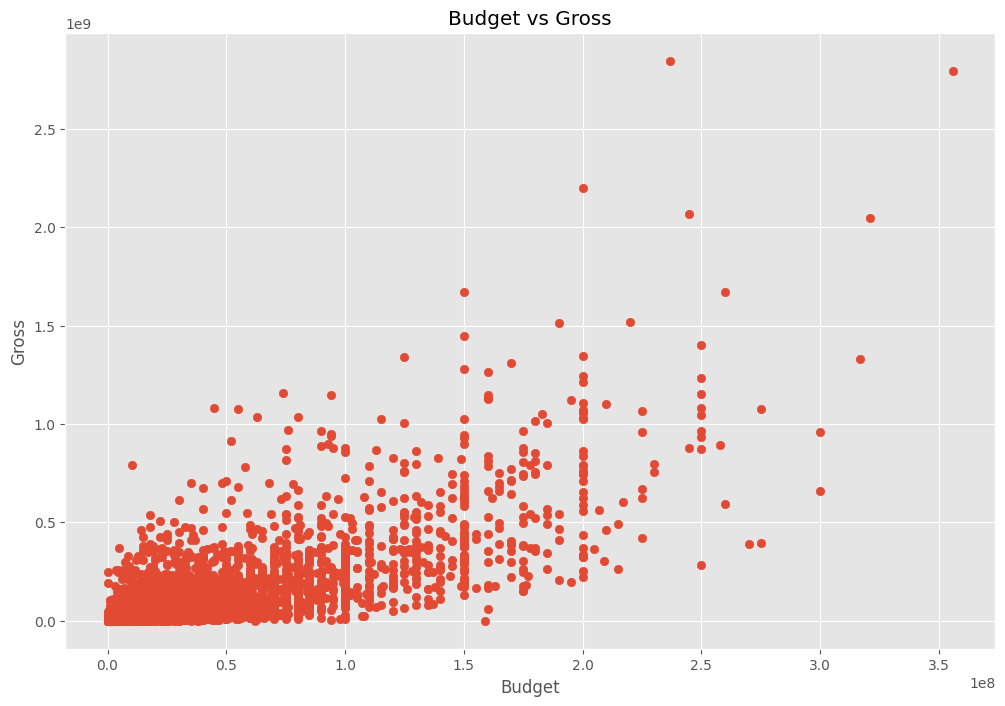

In [33]:
# time to look at possible correlations.

plt.scatter(x=df.budget, y=df.gross)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross')
plt.show()

# We can see a correlation here 

In [38]:
#let's calculate the correlation between gross and budget

corr_budget_gross, p = pearsonr(df.budget, df.gross)
corr_budget_gross

#result = there is a significant correlation

0.740246543921963

In [39]:
#we can use this command to get a possible overview of other possible correlations

df.corr()

/var/folders/1f/9lrdk9f934q4v0k8shj1y4cc0000gn/T/ipykernel_4063/2400362862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057013,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.057013,1.000000,0.455808,0.066443,0.211973,0.394589,0.062234
votes,0.206021,0.455808,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.066443,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.211973,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.394589,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.062234,0.203098,0.320312,0.268721,0.075294,1.000000


In [40]:
correlation_matrix = df.corr()

/var/folders/1f/9lrdk9f934q4v0k8shj1y4cc0000gn/T/ipykernel_4063/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


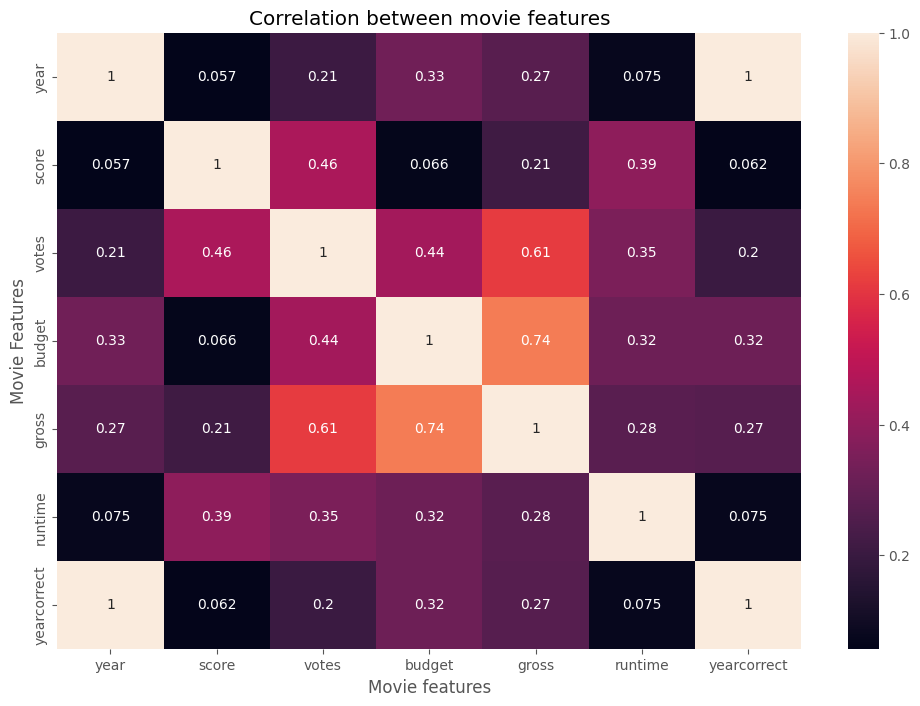

In [42]:
# we can do a heatmap for a better overview of our correlations.

sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie Features')
plt.title('Correlation between movie features')
plt.show()

In [46]:
# let's sort out strong correlations

corr_pairs = correlation_matrix.unstack()
corr_pairs

year         year           1.000000
             score          0.057013
             votes          0.206021
             budget         0.327722
             gross          0.274321
             runtime        0.075077
             yearcorrect    0.998726
score        year           0.057013
             score          1.000000
             votes          0.455808
             budget         0.066443
             gross          0.211973
             runtime        0.394589
             yearcorrect    0.062234
votes        year           0.206021
             score          0.455808
             votes          1.000000
             budget         0.439675
             gross          0.614751
             runtime        0.352303
             yearcorrect    0.203098
budget       year           0.327722
             score          0.066443
             votes          0.439675
             budget         1.000000
             gross          0.740247
             runtime        0.318695
 

In [50]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
             year           1.000000
budget       budget         1.000000
gross        gross          1.000000
votes        votes          1.000000
score        score          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#In the end we have correlations for: 
    votes vs gross
    budget vs gross